In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [27]:
# Loading datasets
diabetes = pd.read_csv("Datasets/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Data pre-processing

corr = diabetes.corr()
sns.heatmap(corr, annot=True)

# The dataset is already pre-processed just we have to balance the data

In [31]:
#balancing datasets
diabetes["Outcome"].value_counts()


diabetes_True = diabetes[diabetes.Outcome == 1]
diabetes_False = diabetes[diabetes.Outcome == 0]
#diabetes_False["Outcome"].value_counts(), diabetes_True["Outcome"].value_counts()

diabetes_False = diabetes_False.sample(n = 268)

diabetes_new = pd.concat([diabetes_True, diabetes_False], axis=0)
diabetes_new["Outcome"].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [52]:
# spliting data into test and train datasets
x = diabetes_new.iloc[:, : -1].values
y = diabetes_new.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

(536,)

In [ ]:
# creating logistic regression model

model = LogisticRegression(fit_intercept=True, max_iter=1000)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

(0.7222222222222222, 0.7636363636363637)

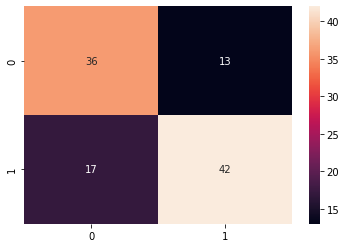

In [61]:
cnf_matrics = metrics.confusion_matrix(y_test, y_predict)

sns.heatmap(cnf_matrics, annot=True)

metrics.accuracy_score(y_test, y_predict), metrics.precision_score(y_test, y_predict)